<a href="https://colab.research.google.com/github/chandan-n-max/scaler_projects/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Scaler wants to analyze its learner database to identify patterns across companies, job roles, experience, and compensation. The goal is to cluster learners with similar professional characteristics and use these clusters to profile top/bottom performers, roles, and companies.

Approach:

* Perform exploratory data analysis and data cleaning

* Create experience-based and compensation-based manual clusters (Designation, Class, Tier)

* Apply unsupervised clustering (K-Means and Hierarchical) on processed features

* Derive actionable business insights for learner profiling and company benchmarking


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


# display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


Saving scaler_clustering.csv to scaler_clustering (3).csv


In [2]:
df = pd.read_csv("scaler_clustering (3).csv")

In [3]:
df.head()


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.shape

(205843, 7)

In [5]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [7]:
df.describe(include='all')

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205843.000000,205799,205843,205757.000000,2.058430e+05,153279,205843.000000
unique,NaN,37299,153443,NaN,NaN,1016,NaN
top,NaN,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,NaN,8337,10,NaN,NaN,43554,NaN
mean,103273.941786,NaN,NaN,2014.882750,2.271685e+06,NaN,2019.628231
std,59741.306484,NaN,NaN,63.571115,1.180091e+07,NaN,1.325104
min,0.000000,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,51518.500000,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,103151.000000,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,154992.500000,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


Dataset has 205,843 rows and 7 columns

Unnamed: 0 is an index column

Numerical columns: ctc, orgyear, ctc_updated_year

Categorical columns: company_hash, email_hash, job_position

Missing values present in company_hash, orgyear, job_position

CTC values vary widely, indicating salary differences across learners

#Segment 2 - Email Uniqueness & Frequency

In [8]:
# Total unique learners
df['email_hash'].nunique()

153443

In [9]:
# Frequency of each email
email_counts = df['email_hash'].value_counts()
email_counts.head()


,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8


In [10]:
# Emails appearing more than once
(email_counts > 1).sum()

np.int64(41216)

In [11]:
# How many times emails repeat
email_counts.value_counts().head()


,count
count,
1,112227
2,32553
3,6749
4,1466
5,329


Total records: 205,843

Unique learners (email_hash): 153,443

41,216 emails appear more than once

Majority of learners appear only once

Repeated emails indicate same learner with multiple records (job/CTC updates)

#Segment 3 - Missing values Check

In [12]:
# Missing values count
df.isnull().sum()


,0
Unnamed: 0,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52564
ctc_updated_year,0


In [13]:
# Missing values percentage
(df.isnull().mean() * 100).round(2)

,0
Unnamed: 0,0.00
company_hash,0.02
email_hash,0.00
orgyear,0.04
ctc,0.00
job_position,25.54
ctc_updated_year,0.00


job_position has 25.54% missing values

orgyear has 0.04% missing values

company_hash has 0.02% missing values

Other columns have no missing values

Missing values need to be handled before analysis

job_position has high missing values → treat as “Unknown”

orgyear missing is very small → mean imputation

company_hash missing is very small → mode imputation

KNN imputation not required due to low numeric missing %

In [14]:
# Impute job_position
df['job_position'] = df['job_position'].fillna('Unknown')

# Impute orgyear with mean
df['orgyear'] = df['orgyear'].fillna(df['orgyear'].mean())

# Impute company_hash with mode
df['company_hash'] = df['company_hash'].fillna(df['company_hash'].mode()[0])

# Verify
df.isnull().sum()


,0
Unnamed: 0,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


Missing values found in job_position, orgyear, and company_hash

job_position filled with 'Unknown'

orgyear imputed using mean

company_hash imputed using mode

Dataset now has no missing values

#Segment 4 — Regex Cleaning

In [15]:
import re

# Clean company_hash
df['company_hash'] = df['company_hash'].astype(str).apply(
    lambda x: re.sub('[^A-Za-z0-9 ]+', '', x)
)

# Clean job_position
df['job_position'] = df['job_position'].astype(str).apply(
    lambda x: re.sub('[^A-Za-z0-9 ]+', '', x)
)

# Quick check
df[['company_hash', 'job_position']].head()


,company_hash,job_position
0,atrgxnnt xzaxv,Other
1,qtrxvzwt xzegwgbb rxbxnta,FullStack Engineer
2,ojzwnvwnxw vx,Backend Engineer
3,ngpgutaxv,Backend Engineer
4,qxen sqghu,FullStack Engineer


Special characters removed from company_hash

Special characters removed from job_position

Text fields are now clean and consistent

Ready for grouping and clustering

#Segment 5 — Duplicate Detection & Removal

In [16]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

In [17]:
# Drop duplicates
df = df.drop_duplicates()

# Verify shape after removal
df.shape

(205843, 7)

No duplicate rows found in the dataset

Row count remains 205,843

No records were removed

#Segment 6 — Feature Engineering (Years of Experience)

In [18]:
from datetime import datetime

current_year = datetime.now().year

# Create Years of Experience
df['years_experience'] = current_year - df['orgyear']

# Quick checks
df['years_experience'].describe()


,years_experience
count,205843.000000
mean,10.117250
std,63.557834
min,-18140.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,2025.000000


In [19]:
# Check negative or unrealistic values
df[df['years_experience'] < 0].shape


(30, 8)

Years of experience has invalid values

Negative values exist

Extremely large values exist (max = 2025)

Caused by incorrect or missing orgyear

In [20]:
# Set invalid experience to NaN
df.loc[(df['years_experience'] < 0) | (df['years_experience'] > 40), 'years_experience'] = np.nan

# Impute with median
df['years_experience'] = df['years_experience'].fillna(df['years_experience'].median())

# Verify
df['years_experience'].describe()


,years_experience
count,205843.000000
mean,9.879690
std,4.219978
min,0.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,40.000000


Created years_experience from orgyear

Invalid values (negative / very large) were detected

Experience capped between 0 and 40 years

Missing/invalid values imputed using median

Final experience values are realistic and usable

#Segment 7 — Manual Aggregation (CTC Statistics)

In [21]:
ctc_stats = (
    df.groupby(['company_hash', 'job_position', 'years_experience'])
      .agg(
          ctc_mean=('ctc', 'mean'),
          ctc_median=('ctc', 'median'),
          ctc_min=('ctc', 'min'),
          ctc_max=('ctc', 'max'),
          employee_count=('ctc', 'count')
      )
      .reset_index()
)

ctc_stats.head()


,company_hash,job_position,years_experience,ctc_mean,ctc_median,ctc_min,ctc_max,employee_count
0,0,Other,5.0,100000.0,100000.0,100000,100000,1
1,0,Unknown,5.0,100000.0,100000.0,100000,100000,1
2,0000,Other,8.0,300000.0,300000.0,300000,300000,1
3,01 ojztqsj,Android Engineer,9.0,270000.0,270000.0,270000,270000,1
4,01 ojztqsj,Frontend Engineer,14.0,830000.0,830000.0,830000,830000,1


Aggregated CTC statistics by company, job position, and experience

Calculated mean, median, min, max CTC

Employee count captured for each group

These aggregates form the base for manual clustering flags

#Segment 8 — Designation Flag (Company + Job + Experience)

Goal:

Compare individual CTC vs group average

Create designation_flag

Rule:

1 → Above group mean

2 → Equal to group mean

3 → Below group mean

In [22]:
# Merge aggregated stats back to main data
df = df.merge(
    ctc_stats,
    on=['company_hash', 'job_position', 'years_experience'],
    how='left'
)

# Create designation flag
df['designation_flag'] = np.where(
    df['ctc'] > df['ctc_mean'], 1,
    np.where(df['ctc'] < df['ctc_mean'], 3, 2)
)

# Quick check
df['designation_flag'].value_counts()


,count
designation_flag,
2,94358
3,69478
1,42007


Created designation_flag at company + role + experience level

Flag meanings:

1 → CTC above group average

2 → CTC equal to group average

3 → CTC below group average

Majority of learners fall in average or below-average CTC category

#Segment 9 — Class Flag (Company + Job Position)

Goal:

Compare individual CTC vs company + job position average

Rule:

1 → Above average

2 → Equal to average

3 → Below average

In [23]:
# Aggregate at Company + Job level
class_stats = (
    df.groupby(['company_hash', 'job_position'])
      .agg(
          class_ctc_mean=('ctc', 'mean'),
          class_ctc_median=('ctc', 'median'),
          class_ctc_min=('ctc', 'min'),
          class_ctc_max=('ctc', 'max'),
          class_employee_count=('ctc', 'count')
      )
      .reset_index()
)

# Merge back
df = df.merge(
    class_stats,
    on=['company_hash', 'job_position'],
    how='left'
)

# Create class flag
df['class_flag'] = np.where(
    df['ctc'] > df['class_ctc_mean'], 1,
    np.where(df['ctc'] < df['class_ctc_mean'], 3, 2)
)

# Check distribution
df['class_flag'].value_counts()


,count
class_flag,
3,102497
2,56043
1,47303


Created class_flag at company + job position level

Flag meanings:

1 → Above role average

2 → Around role average

3 → Below role average

Majority of learners earn below the role average within their company

#Segment 10 — Tier Flag (Company Level)

Goal:

Compare individual CTC vs company average

Rule:

1 → Above company average

2 → Equal to company average

3 → Below company average

In [24]:
# Aggregate at Company level
tier_stats = (
    df.groupby('company_hash')
      .agg(
          tier_ctc_mean=('ctc', 'mean'),
          tier_ctc_median=('ctc', 'median'),
          tier_ctc_min=('ctc', 'min'),
          tier_ctc_max=('ctc', 'max'),
          tier_employee_count=('ctc', 'count')
      )
      .reset_index()
)

# Merge back
df = df.merge(
    tier_stats,
    on='company_hash',
    how='left'
)

# Create tier flag
df['tier_flag'] = np.where(
    df['ctc'] > df['tier_ctc_mean'], 1,
    np.where(df['ctc'] < df['tier_ctc_mean'], 3, 2)
)

# Check distribution
df['tier_flag'].value_counts()


,count
tier_flag,
3,126888
1,45767
2,33188


Created tier_flag at company level

Flag meanings:

1 → Above company average CTC

2 → Around company average

3 → Below company average

Majority of learners earn below their company’s average CTC

#Segment 11 — Business Questions (Queries Only)

In [25]:
# Top 10 employees (Tier 1)
df[df['tier_flag'] == 1].sort_values('ctc', ascending=False).head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience,ctc_mean,ctc_median,ctc_min,ctc_max,employee_count,designation_flag,class_ctc_mean,class_ctc_median,class_ctc_min,class_ctc_max,class_employee_count,class_flag,tier_ctc_mean,tier_ctc_median,tier_ctc_min,tier_ctc_max,tier_employee_count,tier_flag
117636,117948,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,Unknown,2016.0,7.0,1.289778e+08,128977777.5,2400000,255555555,2,1,1.289778e+08,128977777.5,2400000,255555555,2,1,4.395259e+07,1955000.0,750000,255555555,6,1
31111,31142,ofxssj,c5f5699f15e549854ce87aa7dd082ea42be8c6b2460dc7...,2014.0,200000000,Other,2020.0,11.0,5.022000e+07,11200000.0,400000,200000000,5,1,1.942389e+07,670000.0,300000,200000000,18,1,3.754674e+06,2520000.0,168000,200000000,285,1
49046,49101,cxcg,e2dd499e56ff7cebd30856322f486fb6736cee7785cbb5...,2018.0,200000000,Android Engineer,2020.0,7.0,2.000000e+08,200000000.0,200000000,200000000,1,2,2.000000e+08,200000000.0,200000000,200000000,1,2,5.042500e+07,675000.0,350000,200000000,4,1
78958,79072,otre tburgjta,3c453dd102ae47a4ed1841be352213fad363d0944177e9...,2020.0,200000000,Backend Engineer,2020.0,5.0,6.761000e+07,2000000.0,830000,200000000,3,1,4.974418e+06,900000.0,25000,200000000,55,1,6.250576e+06,600000.0,7000,200000000,664,1
22185,22200,nvnv wgzohrnvzwj otqcxwto,97d25613e7bc3f47c87492d311f77232c105e4bc9ce642...,2018.0,200000000,Support Engineer,2020.0,7.0,4.893948e+06,430000.0,3300,200000000,91,1,2.677364e+06,420000.0,3300,200000000,584,1,1.663198e+06,451999.0,600,200000000,8381,1
1673,1673,mvzp ge vbtqxwv,0391b9c03e6601ce26e7257e6b9eb80a49304123a05217...,2014.0,200000000,Devops Engineer,2020.0,11.0,1.002467e+08,100000000.0,740000,200000000,3,1,3.910962e+07,1450000.0,137000,200000000,8,1,3.557332e+06,1200000.0,2000,200000000,268,1
57039,57111,nvnv trdox,f827f5d96673e7634c773613b9a73dcc1d4551340c26c4...,2018.0,200000000,Other,2020.0,7.0,4.039200e+07,600000.0,320000,200000000,5,1,1.403144e+07,660000.0,6600,200000000,15,1,2.582165e+06,650000.0,6600,200000000,110,1
30877,30908,znn avnv otqcxwto,b755d7d321b0a55cc94e09654c17f476ca586da0b25978...,2014.0,200000000,Support Engineer,2020.0,11.0,6.713333e+07,900000.0,500000,200000000,3,1,1.294750e+07,410000.0,300000,200000000,16,1,1.755204e+06,705000.0,9000,200000000,252,1
78974,79088,myvqvn ovzwyvq zxsvb rxbxnta,9b0725defc38f67d8f440b2edbb87b6ce03fb5cfc137c9...,2015.0,200000000,Data Analyst,2020.0,10.0,2.000000e+08,200000000.0,200000000,200000000,1,2,2.000000e+08,200000000.0,200000000,200000000,1,2,8.881240e+06,1000000.0,316000,200000000,25,1
5936,5937,nvnv wgzohrnvzwj otqcxwto,199146d59076620fa919a1b4e510303885a9b47d079243...,2017.0,200000000,Support Engineer,2020.0,8.0,6.779070e+06,470000.0,280000,200000000,71,1,2.677364e+06,420000.0,3300,200000000,584,1,1.663198e+06,451999.0,600,200000000,8381,1


In [26]:
# Bottom 10 employees (Tier 3)
df[df['tier_flag'] == 3].sort_values('ctc').head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience,ctc_mean,ctc_median,ctc_min,ctc_max,employee_count,designation_flag,class_ctc_mean,class_ctc_median,class_ctc_min,class_ctc_max,class_employee_count,class_flag,tier_ctc_mean,tier_ctc_median,tier_ctc_min,tier_ctc_max,tier_employee_count,tier_flag
135435,135886,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,Backend Engineer,2019.0,11.0,1.000001e+06,1000001.0,2,2000000,2,3,8.047827e+05,670000.0,2,2400000,23,3,1.471176e+06,1000000.0,2,10000000,74,3
118236,118549,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,Unknown,2018.0,12.0,1.000000e+01,10.0,6,14,2,3,1.528948e+06,1000000.0,6,10000000,19,3,1.471176e+06,1000000.0,2,10000000,74,3
114164,114452,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,Unknown,2018.0,12.0,1.000000e+01,10.0,6,14,2,1,1.528948e+06,1000000.0,6,10000000,19,3,1.471176e+06,1000000.0,2,10000000,74,3
184946,185851,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,Unknown,2018.0,9.0,1.500000e+01,15.0,15,15,1,2,1.550000e+01,15.5,15,16,2,3,1.550000e+01,15.5,15,16,2,3
116946,117256,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022.0,200,Unknown,2021.0,3.0,2.000000e+02,200.0,200,200,1,2,2.000000e+02,200.0,200,200,1,2,3.140000e+04,4000.0,200,90000,3,3
99419,99630,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018.0,600,FullStack Engineer,2021.0,7.0,1.307186e+06,1250000.0,600,2600000,14,3,1.412721e+06,1250000.0,600,4500000,48,3,2.229684e+06,1400000.0,600,200000000,473,3
150682,151262,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023.0,600,Unknown,2019.0,2.0,2.291873e+06,2200000.0,600,7500000,11,3,1.941214e+06,1000000.0,600,100000000,734,3,2.134877e+06,924999.5,600,200000000,1696,3
171196,171977,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,Backend Engineer,2017.0,13.0,3.644656e+06,720000.0,600,100000000,39,3,1.168632e+06,462500.0,600,200000000,1356,3,1.663198e+06,451999.0,600,200000000,8381,3
61989,62073,sttpoegqsttpo,1694233be08738b7b50bdb7649b792f0ab8a514c01bec9...,2016.0,1000,Unknown,2019.0,9.0,1.000000e+03,1000.0,1000,1000,1,2,7.357333e+05,500000.0,1000,1700000,15,3,8.978364e+05,700000.0,1000,10000000,55,3
127189,127591,tznqtuqtzthq btaxv,5281828ed60da057750fca673995fefd09ea72f5cbe25a...,2001.0,1000,FullStack Engineer,2018.0,24.0,1.000000e+03,1000.0,1000,1000,1,2,1.000000e+03,1000.0,1000,1000,1,2,4.890000e+05,400000.0,1000,1200000,9,3


In [27]:
# Top 10 Data Science employees in each company (Class 1)
df[(df['job_position'].str.contains('Data', case=False, na=False)) & (df['class_flag'] == 1)] \
  .sort_values('ctc', ascending=False).groupby('company_hash').head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience,ctc_mean,ctc_median,ctc_min,ctc_max,employee_count,designation_flag,class_ctc_mean,class_ctc_median,class_ctc_min,class_ctc_max,class_employee_count,class_flag,tier_ctc_mean,tier_ctc_median,tier_ctc_min,tier_ctc_max,tier_employee_count,tier_flag
836,836,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,2017.0,200000000,Data Scientist,2020.0,8.0,2.000000e+08,200000000.0,200000000,200000000,1,2,4.113400e+07,1400000.0,770000,200000000,5,1,5.616465e+06,850000.0,300000,200000000,43,1
909,909,wgszxkvzn,aad581a532f319c76c6e73937572feed9867d5ee2f1093...,2014.0,200000000,Data Analyst,2020.0,11.0,1.656733e+07,780000.0,4300,200000000,19,1,4.155861e+06,520000.0,4300,200000000,113,1,1.739554e+06,580000.0,3000,200000000,3240,1
26078,26103,gnytq,6d4a5d19e889596252b038ee0409510aec8c0b32007fb9...,2017.0,200000000,Data Analyst,2020.0,8.0,6.930000e+07,7300000.0,600000,200000000,3,1,2.381667e+07,820000.0,230000,200000000,9,1,9.150908e+06,600000.0,2300,200000000,328,1
31297,31329,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,2015.0,200000000,Data Scientist,2019.0,10.0,2.000000e+08,200000000.0,200000000,200000000,1,2,6.743667e+07,1560000.0,750000,200000000,3,1,2.932143e+07,750000.0,420000,200000000,7,1
69086,69183,wgzahtzn,9ce2995b2221fe627e861daea9d0603872cce8cc128390...,2016.0,200000000,Data Analyst,2020.0,9.0,1.002300e+08,100230000.0,460000,200000000,2,1,3.387917e+07,430000.0,380000,200000000,6,1,3.652556e+06,700000.0,80000,200000000,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48553,48608,hztburgjta,d20896f6b34a14116ab526443c6a56e9192eb81cdc456b...,2014.0,200000,Data Analyst,2019.0,11.0,2.000000e+05,200000.0,200000,200000,1,2,1.775000e+05,177500.0,155000,200000,2,1,1.230712e+06,300000.0,2000,50000000,80,3
125156,125535,xzatrrxtzn,cafbe82bdd822f80cdf232311a09fb8d8c6ccdac5786f2...,2018.0,180000,Data Scientist,2019.0,7.0,1.450000e+05,145000.0,110000,180000,2,1,1.450000e+05,145000.0,110000,180000,2,1,1.450000e+05,145000.0,110000,180000,2,1
70879,70978,urhbxzw,89c50595727487bfa7d687bb168d2c2b55a57646876a4d...,2017.0,155000,Data Scientist,2018.0,8.0,1.400000e+05,140000.0,125000,155000,2,1,1.400000e+05,140000.0,125000,155000,2,1,1.400000e+05,140000.0,125000,155000,2,1
48811,48866,mvjtq,db2c70fea469a7f1456457812fe94a01c337eb6ce75bd5...,2018.0,115000,Data Scientist,2019.0,7.0,1.150000e+05,115000.0,115000,115000,1,2,1.055000e+05,105500.0,96000,115000,2,1,1.833250e+06,725000.0,96000,10000000,8,3


In [28]:
# Bottom 10 Data Science employees in each company (Class 3)
df[(df['job_position'].str.contains('Data', case=False, na=False)) & (df['class_flag'] == 3)] \
  .sort_values('ctc').groupby('company_hash').head(10)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience,ctc_mean,ctc_median,ctc_min,ctc_max,employee_count,designation_flag,class_ctc_mean,class_ctc_median,class_ctc_min,class_ctc_max,class_employee_count,class_flag,tier_ctc_mean,tier_ctc_median,tier_ctc_min,tier_ctc_max,tier_employee_count,tier_flag
147805,148365,zgn vuurxwvmrt vwwghzn,299f764fcae62f331f3c5eb1b451e7107302ded46e2a71...,2007.0,1000,Data Analyst,2021.0,18.0,1000.0,1000.0,1000,1000,1,2,7.988129e+06,575000.0,1000,100000000,70,3,2.381307e+06,600000.0,1000,199800000,3411,3
177550,178390,nvnv wgzohrnvzwj otqcxwto,3becd3658bc0d426f8867142eb6cbd7e9ca9f43b572794...,2018.0,3500,Database Administrator,2019.0,7.0,20353350.0,395000.0,3500,200000000,10,3,7.809081e+06,409999.0,3500,200000000,43,3,1.663198e+06,451999.0,600,200000000,8381,3
190300,191250,fxootz xzegntwy,9810176ff1b7312a460834736ac273104d5152d3ded540...,2005.0,3800,Database Administrator,2019.0,20.0,3800.0,3800.0,3800,3800,1,2,2.346000e+05,300000.0,3800,400000,3,3,1.048650e+06,1300000.0,3800,2600000,12,3
8705,8707,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,2018.0,4000,Data Scientist,2019.0,7.0,4000.0,4000.0,4000,4000,1,2,3.520000e+05,352000.0,4000,700000,2,3,6.264615e+05,650000.0,4000,910000,13,3
10835,10840,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,2017.0,4000,Data Scientist,2019.0,8.0,4000.0,4000.0,4000,4000,1,2,3.246667e+05,420000.0,4000,550000,3,3,5.895806e+05,500000.0,4000,1400000,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,3152,sggsrt,f8c5a8802297e94f97356e99b8c46228f72e5c012b1cff...,2021.0,3800000,Data Scientist,2020.0,4.0,3800000.0,3800000.0,3800000,3800000,1,2,4.761222e+06,1700000.0,10000,22000000,9,3,5.652113e+06,2500000.0,1000,200000000,468,3
92858,93035,fgqpehoxgz,6f7c8da2e0d377d85a59c64724c73930277065c1510262...,2011.0,3900000,Data Scientist,2016.0,14.0,3900000.0,3900000.0,3900000,3900000,1,2,4.400000e+06,4400000.0,3900000,4900000,2,3,3.800000e+06,3900000.0,2600000,4900000,3,1
89151,89307,yaew rxet,3d3685ed8b43efc9e478920c55ad9e62b8c7aded2261cd...,1997.0,4000000,Data Scientist,2019.0,28.0,4000000.0,4000000.0,4000000,4000000,1,2,4.500000e+06,4500000.0,4000000,5000000,2,3,5.463704e+06,640000.0,200000,120000000,27,3
17448,17459,xzattawgb,0442787ae22a16022131f18e10e689aca9bfbb193713a7...,2016.0,4800000,Data Scientist,2019.0,9.0,5200000.0,5200000.0,4800000,5600000,2,3,5.200000e+06,5200000.0,4800000,5600000,2,3,3.536875e+06,3750000.0,90000,9000000,24,1


In [29]:
# Top 10 companies by average CTC
df.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)


,ctc
company_hash,
whmxw rgsxwo uqxcvnt rxbxnta,1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj,2.500000e+08
evwxrt otqcxwto,2.000000e+08
ogzv wgrrtst ge ntwyzgrgsjvzzv hzxctqoxnj,2.000000e+08
yxzahlv sgmvr ogrhnxgzo,2.000000e+08
ehlxonh,2.000000e+08
xwhmt ogrhnxgzo,2.000000e+08
xtrrxuot ntwyzgrgsxto,2.000000e+08
vwwg,2.000000e+08


In [30]:
# Top 2 job positions per company by average CTC
df.groupby(['company_hash', 'job_position'])['ctc'].mean() \
  .reset_index() \
  .sort_values(['company_hash', 'ctc'], ascending=[True, False]) \
  .groupby('company_hash').head(2)

,company_hash,job_position,ctc
0,0,Other,100000.0
1,0,Unknown,100000.0
2,0000,Other,300000.0
4,01 ojztqsj,Frontend Engineer,830000.0
3,01 ojztqsj,Android Engineer,270000.0
...,...,...,...
71286,zz,Unknown,500000.0
71287,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0
71288,zzb ztdnstz vacxogqj ucn rna,Unknown,600000.0
71289,zzgato,Unknown,130000.0


Top Tier-1 employees earn extremely high CTCs (₹20–100+ Cr), far above company averages

Bottom Tier-3 employees include very low CTC values (even ₹2–₹1,000), indicating outliers or data quality issues

Data Science roles show high variance:

Some Data Scientists / Analysts are among the highest paid in their companies (Class 1)

At the same time, many Data Science roles fall in Class 3, earning far below peers

Top companies by average CTC are driven by very few high-paying employees, not broad high pay

Within most companies, only 1–2 job roles command the highest average CTC, showing role-based pay concentration

#Segment 12 — Data Prep for Unsupervised Clustering

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Select reduced features
features = df[['job_position', 'years_experience', 'ctc']]

# One-hot encode job_position only
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_job = encoder.fit_transform(features[['job_position']])

# Scale numeric features
scaler = StandardScaler()
scaled_num = scaler.fit_transform(features[['years_experience', 'ctc']])

# Combine
X = np.hstack([encoded_job, scaled_num])

X.shape


(205843, 1007)

Selected relevant features for clustering

One-hot encoded job_position

Scaled years_experience and ctc

Final clustering dataset has 205,843 rows and 1,007 features

Data is ready for unsupervised learning

#Segment 13 — Clustering Tendency Check

In [32]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Hopkins statistic
def hopkins_statistic(X, m=500):
    np.random.seed(42)
    n, d = X.shape
    m = min(m, n)

    rand_indices = np.random.choice(n, m, replace=False)
    X_sample = X[rand_indices]

    X_min, X_max = X.min(axis=0), X.max(axis=0)
    U = np.random.uniform(X_min, X_max, size=(m, d))

    nbrs = NearestNeighbors(n_neighbors=2).fit(X)

    u_dist, _ = nbrs.kneighbors(U, n_neighbors=1)
    w_dist, _ = nbrs.kneighbors(X_sample, n_neighbors=2)

    H = u_dist.sum() / (u_dist.sum() + w_dist[:, 1].sum())
    return H

hopkins_statistic(X)


np.float64(0.9994892945528294)

Hopkins statistic ≈ 0.999

Value is close to 1

Strong clustering tendency present

Data is highly suitable for clustering

#Segment 14 — K-Means Clustering

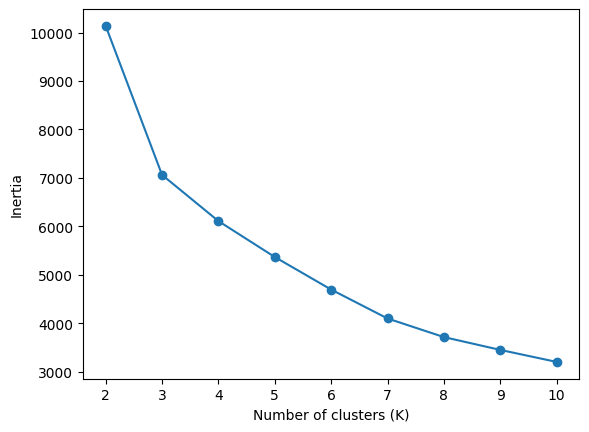

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample to reduce computation
X_sample = X[np.random.choice(X.shape[0], 5000, replace=False)]

inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_sample)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()


In [34]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X)


In [35]:
df['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
2,149721
0,54784
1,1338


Elbow curve shows a clear bend around K = 3

Chose 3 clusters for K-Means

Cluster distribution:

Cluster 0: 54,784 learners

Cluster 1: 1,338 learners (small, distinct group)

Cluster 2: 149,721 learners

One cluster is very small → likely high-CTC or niche profiles

Other clusters represent majority and mid-range profiles


#Segment 15 — Hierarchical Clustering

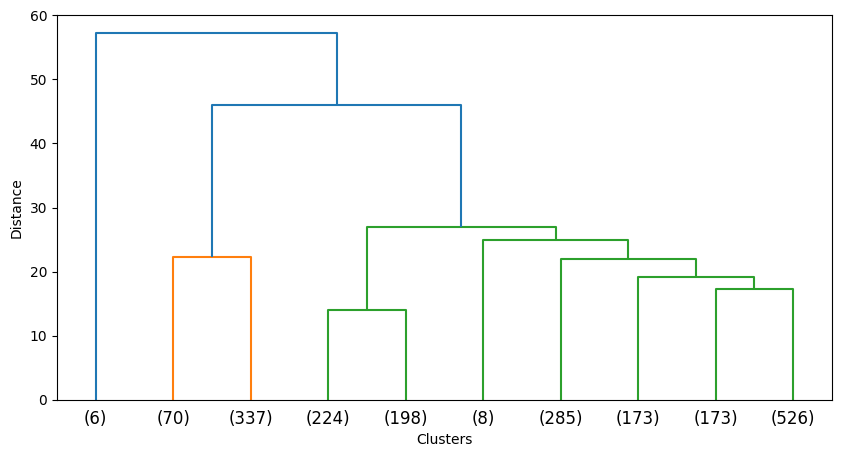

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample data
X_hier = X[np.random.choice(X.shape[0], 2000, replace=False)]

# Linkage
Z = linkage(X_hier, method='ward')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=10)
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()

Dendrogram shows a clear separation at higher distance

Natural cut suggests ~3 clusters

Hierarchical results support K-Means (K = 3)

Confirms stability of clustering structure

#Segment 16 – Actionable Insights & Recommendations

Key Insights:

Learner compensation is highly skewed; a small group earns extremely high CTCs

Most learners fall below company and role averages

Data Science roles show large pay dispersion across companies

Clustering consistently reveals 3 distinct learner groups:

High-CTC niche group

Mid-range majority group

Low-CTC group



Recommendations:

Target high-CTC cluster for premium programs and alumni branding

Use mid-range cluster for upskilling and salary growth-focused courses

Support low-CTC cluster with foundational and transition programs

Share company and role benchmarks with learners to guide career decisions

Use cluster insights to prioritize company partnerships with higher pay potential